In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data.csv')

dframe=pd.DataFrame(data)
dframe.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


*checking for duplicate rows

In [ ]:
duplicate_rows_df = data[data.duplicated()]

#affiche nbr rows duppliqués
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


*checking for missing values

In [ ]:
print(data.isnull().sum())

process.b1.capacity    0
process.b2.capacity    0
process.b3.capacity    0
process.b4.capacity    0
property.price         0
property.product       0
property.winner        0
verification.result    0
verification.time      0
dtype: int64


*Pair plot

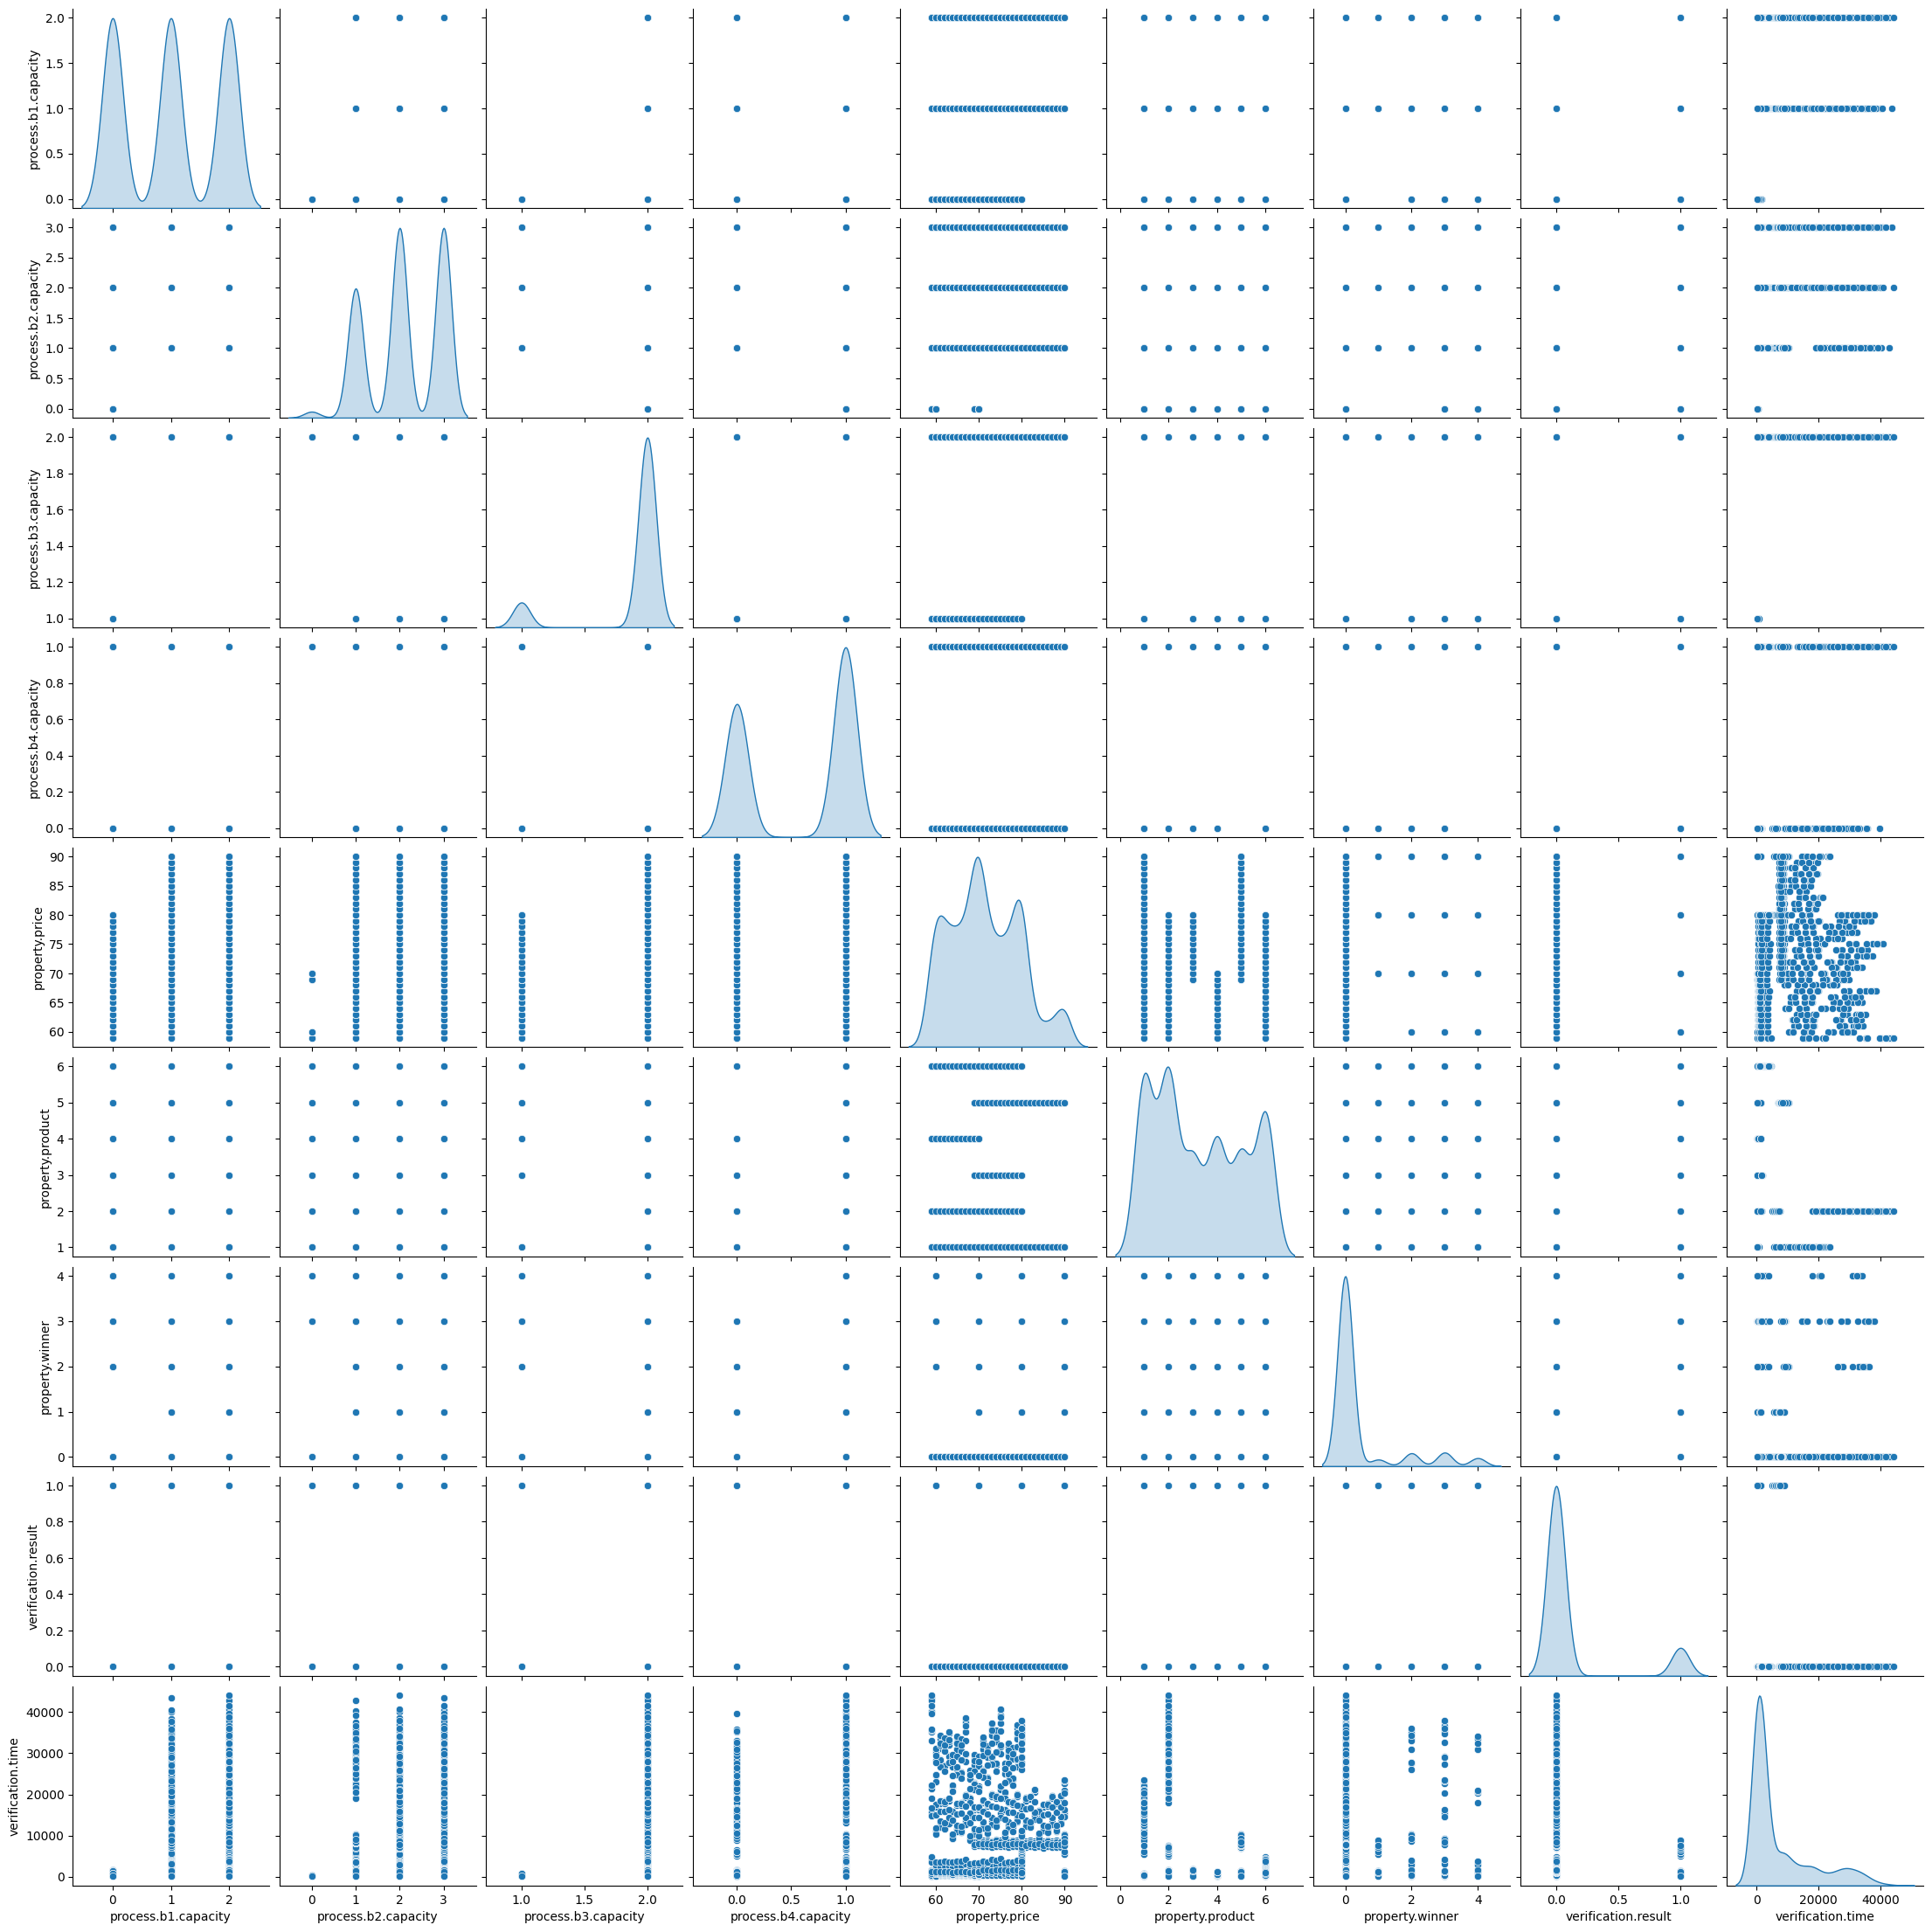

In [ ]:
sns.pairplot(data, diag_kind='kde')

*checking data values types

In [ ]:
for col in data.columns:
    print(f"{col}: {data[col].apply(type).unique()}")

process.b1.capacity: [<class 'int'>]
process.b2.capacity: [<class 'int'>]
process.b3.capacity: [<class 'int'>]
process.b4.capacity: [<class 'int'>]
property.price: [<class 'int'>]
property.product: [<class 'int'>]
property.winner: [<class 'int'>]
verification.result: [<class 'bool'>]
verification.time: [<class 'float'>]


*search for outliers

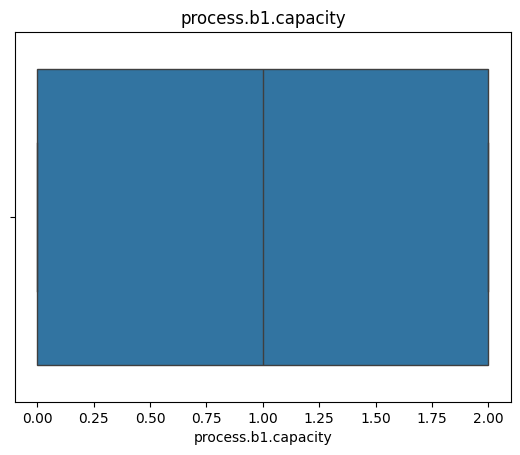

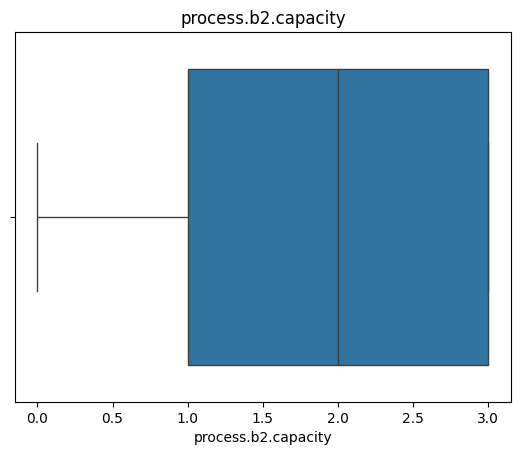

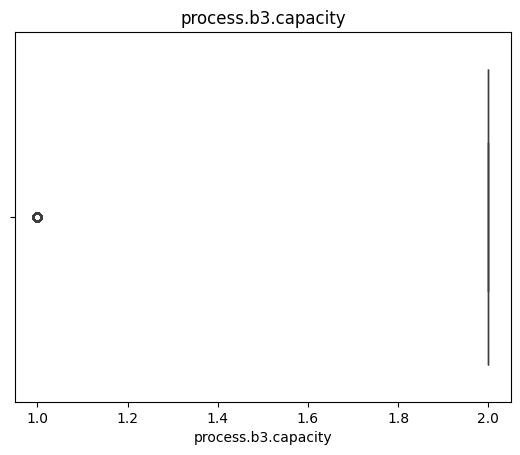

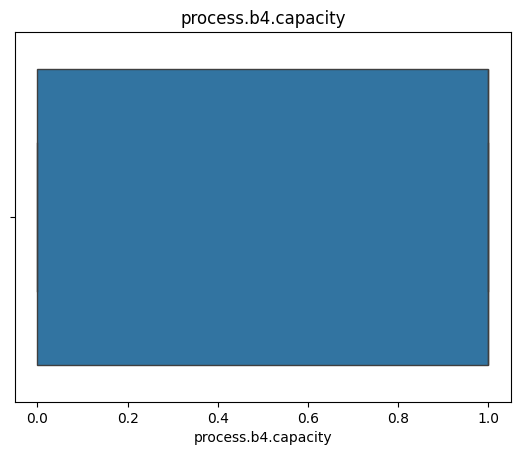

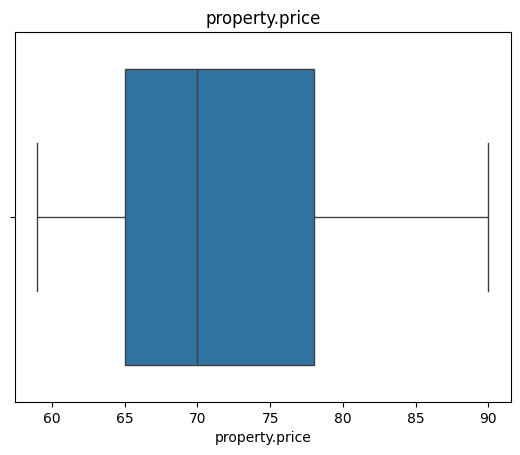

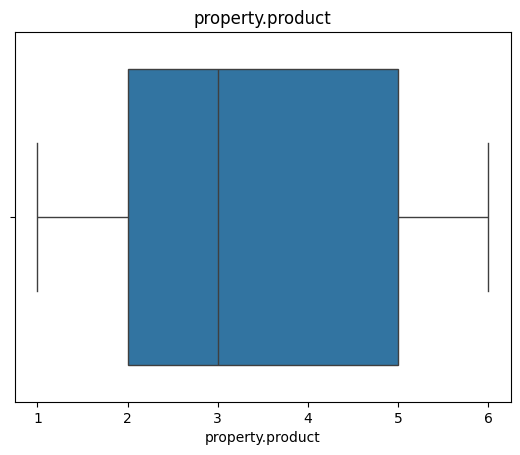

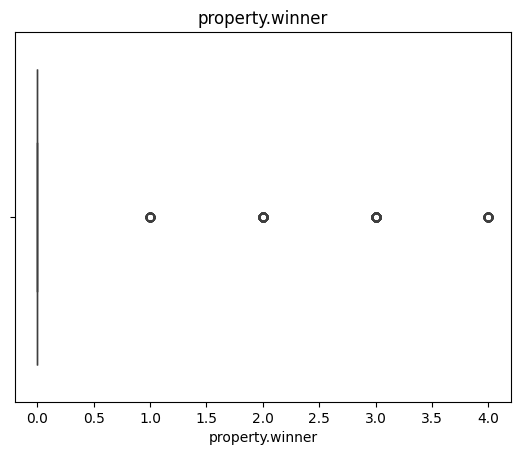

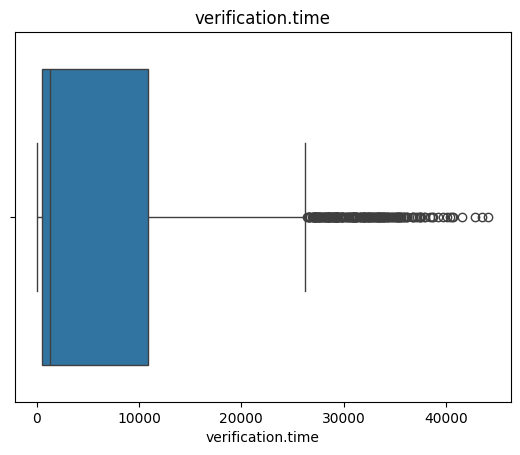

In [ ]:
# Visualize outliers using boxplots
num_columns = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price', 'property.product', 'property.winner', 'verification.time']  # Add relevant columns
for col in num_columns:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()

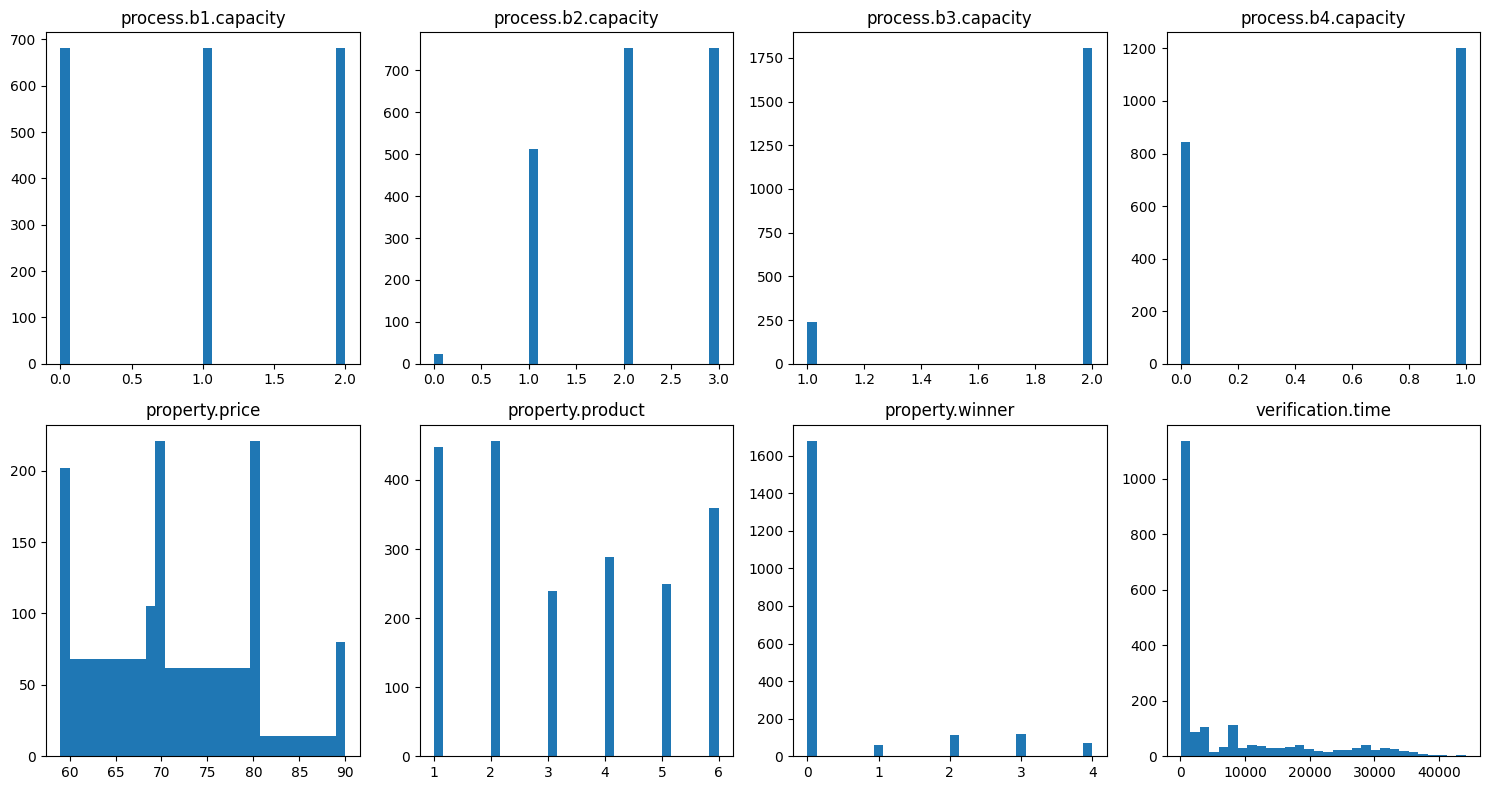

In [ ]:
num_columns = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price', 'property.product', 'property.winner', 'verification.time']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the axes array to easily loop through
axes = axes.flatten()

# Loop through each column and plot its histogram
for i, column in enumerate(num_columns):
    axes[i].hist(data[column], bins=30)
    axes[i].set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

*scaling

In [ ]:

num_columns = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price', 'property.product', 'property.winner']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
data[num_columns] = scaler.fit_transform(data[num_columns])

In [ ]:
#checking data after scaling
print(data.head)

<bound method NDFrame.head of       process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                     0.0                  0.0                  1.0   
1                     0.0                  0.0                  1.0   
2                     0.0                  0.0                  1.0   
3                     0.0                  0.0                  1.0   
4                     0.0                  0.0                  1.0   
...                   ...                  ...                  ...   
2038                  1.0                  1.0                  1.0   
2039                  1.0                  1.0                  1.0   
2040                  1.0                  1.0                  1.0   
2041                  1.0                  1.0                  1.0   
2042                  1.0                  1.0                  1.0   

      process.b4.capacity  property.price  property.product  property.winner  \
0                     1.0        0.00

*checking correlation

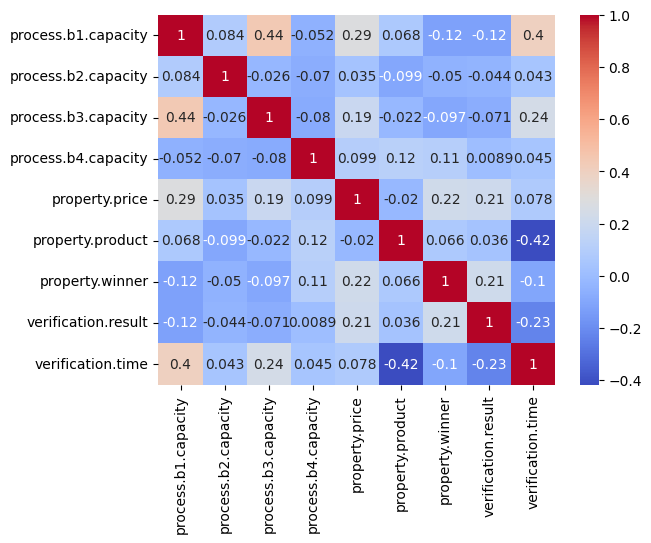

In [ ]:
# Correlation matrix
corr_matrix = data.corr()

# Visualize
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

*Features selection

In [ ]:


# Define the numerical columns (excluding the target)
num_columns = data.select_dtypes(include=['number']).columns.tolist()
num_columns.remove('verification.time')  # Exclude the target column

# Step 1: Recursive Feature Elimination (RFE) with RandomForestRegressor
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(data[num_columns], data['verification.time'])

# Step 2: Select important features
selected_featuresreg = [num_columns[i] for i in range(len(num_columns)) if rfe.support_[i]]
print("Selected Features:", selected_featuresreg)

# Step 3: Reduced dataset with selected features
reduced_datareg = data[selected_featuresreg]

Selected Features: ['process.b1.capacity', 'process.b4.capacity', 'property.price', 'property.product', 'property.winner']


In [ ]:


# Load your dataset (assuming it's already preprocessed)
X = data[num_columns]
y = data['verification.time']

# Initialize and fit the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort the features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Display the sorted feature importance
print("Feature Importance:\n", sorted_features)


Feature Importance:
 property.product       4.773853e-01
process.b1.capacity    3.908014e-01
property.price         5.619489e-02
property.winner        5.158263e-02
process.b4.capacity    2.209564e-02
process.b2.capacity    1.940108e-03
process.b3.capacity    1.108849e-07
dtype: float64


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Ensure your target column exists
target_column = 'verification.result'

# Step 1: Recursive Feature Elimination (RFE)
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(data[num_columns], data[target_column])

# Step 2: Select important features
selected_features = [num_columns[i] for i in range(len(num_columns)) if rfe.support_[i]]
print("Selected Features:", selected_features)

# Step 3: Reduced dataset with selected features
reduced_data = data[selected_features]

Selected Features: ['process.b1.capacity', 'process.b2.capacity', 'property.price', 'property.product', 'property.winner']


*checking* for imbalenced classificatoin

<Axes: xlabel='verification.result'>

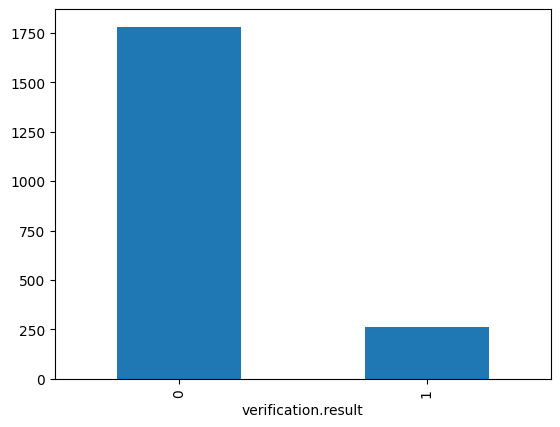

In [ ]:
#imbalenced data
data['verification.result'].value_counts().plot(kind='bar')

*fixing unbalancing

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(reduced_data, data['verification.result'])

In [ ]:
#disply data info
print(X_resampled.shape)
print(y_resampled.shape)

(3562, 5)
(3562,)


In [ ]:
 processed_data = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
processed_data.head()

,process.b1.capacity,process.b2.capacity,property.price,property.product,property.winner,verification.result
0,0.0,0.0,0.000000,0.0,0.0,0
1,0.0,0.0,0.000000,0.2,0.0,0
2,0.0,0.0,0.000000,0.6,0.0,0
3,0.0,0.0,0.000000,1.0,0.0,0
4,0.0,0.0,0.032258,0.0,0.0,1


*saving data

In [ ]:
processed_data.to_csv('processed_data_with_target.csv', index=False)
print("Processed data with target saved as 'processed_data_with_target.csv'")

Processed data with target saved as 'processed_data_with_target.csv'


In [ ]:
processed_data_regression = pd.concat([reduced_datareg, data['verification.time']], axis=1)

NameError: name 'pd' is not defined

In [ ]:
processed_data_regression.to_csv('processed_data_with_target_regression2.csv', index=False)
print("Processed data with target saved as 'processed_data_with_target.csv'")

Processed data with target saved as 'processed_data_with_target.csv'
